# Performing clustering on the iris dataset

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.csv')

# Performing EDA

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.drop('Id', axis = 1, inplace=True)

In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


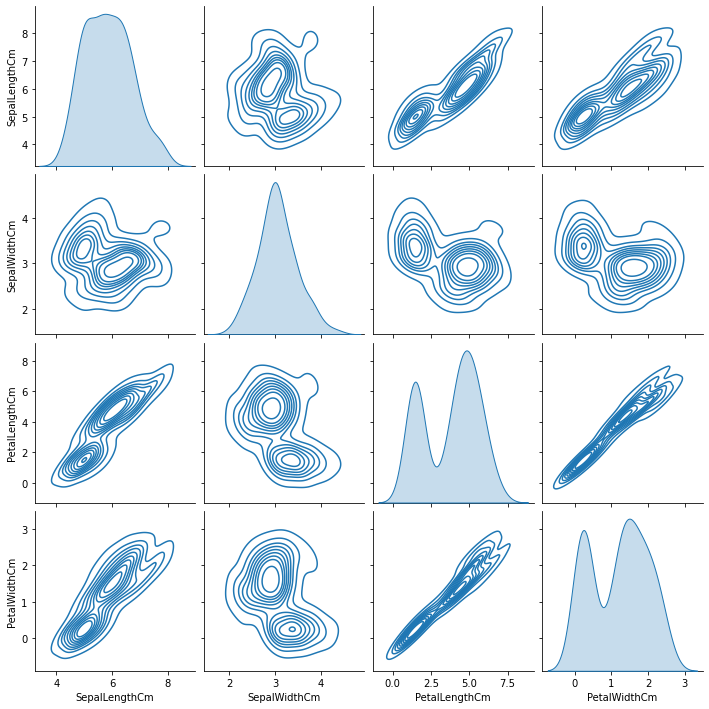

In [7]:
sns.pairplot(data=iris, kind='kde');

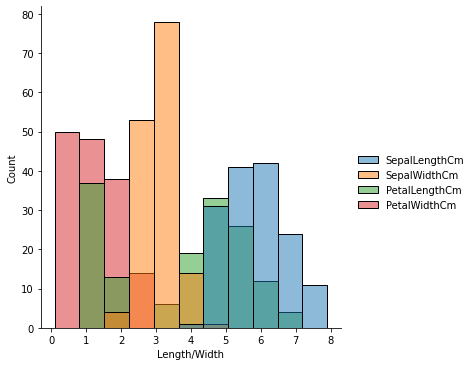

In [8]:
sns.displot(data=iris);
plt.xlabel('Length/Width');

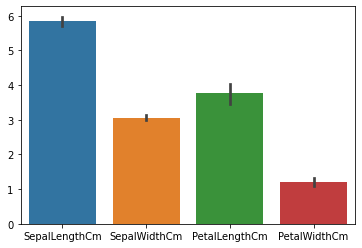

In [9]:
sns.barplot(data = iris);

<AxesSubplot:>

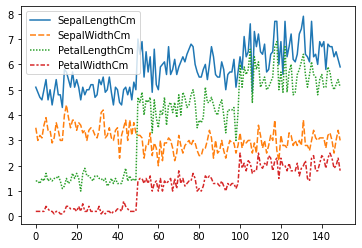

In [10]:
sns.lineplot(data=iris)

In [11]:
corr = iris.corr()

<AxesSubplot:>

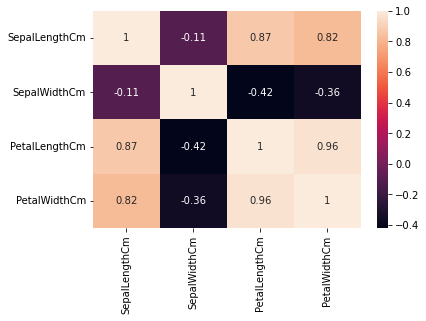

In [12]:
sns.heatmap(corr, annot=True)

# Preprocessing Data for Modeling

In [13]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [14]:
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder()

In [15]:
iris1 = pd.DataFrame(ordinal_encoder.fit_transform(iris))

In [16]:
iris1.head()

,0,1,2,3,4
0,8.0,14.0,4.0,1.0,0.0
1,6.0,9.0,4.0,1.0,0.0
2,4.0,11.0,3.0,1.0,0.0
3,3.0,10.0,5.0,1.0,0.0
4,7.0,15.0,4.0,1.0,0.0


In [17]:
iris1 = scaler.fit_transform(iris1)

# Building Model

In [18]:
from sklearn.cluster import KMeans

In [19]:
km_model = KMeans(n_clusters=3, random_state=0)

In [20]:
km_model.fit(iris1)

KMeans(n_clusters=3, random_state=0)

In [21]:
pred = km_model.predict(iris1)

In [22]:
clusters = list(km_model.labels_)

In [23]:
iris['clusters'] = pred

In [24]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Checking Model Performance

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
km_model.inertia_

175.94180297731677

In [27]:
labels = km_model.labels_

In [28]:
silhouette_score(iris1, labels)

0.477170544333637

# Parameter tuning

In [29]:
inert = []
sil = []
for i in range(2, 10):
    km_model = KMeans(n_clusters=i, random_state=0).fit(iris1)
    inert.append(km_model.inertia_)
    sil.append(silhouette_score(iris1, labels))


# Using the elbow method 

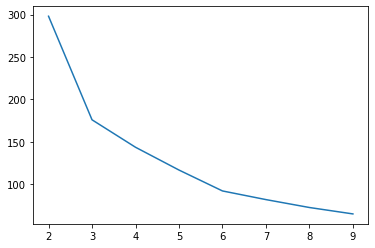

In [30]:
sns.lineplot(x=range(2,10), y=inert);

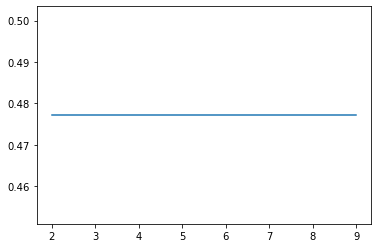

In [31]:
sns.lineplot(x=range(2,10), y=sil);

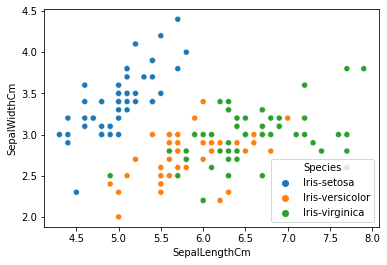

In [48]:
sns.scatterplot(x=iris['SepalLengthCm'], y =iris['SepalWidthCm'] , hue = iris['Species']);

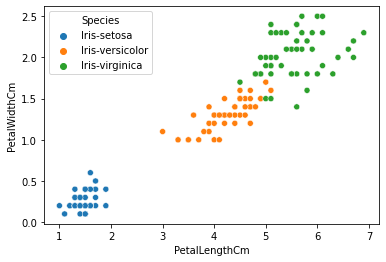

In [45]:
sns.scatterplot(x=iris['PetalLengthCm'], y =iris['PetalWidthCm'] , hue = iris['Species']);

In [37]:
iris['cluster1'] = iris['clusters']

In [39]:
iris.to_csv('iris1.csv', index = False)

In [40]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters,cluster1
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   clusters       150 non-null    int32  
 6   cluster1       150 non-null    int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 7.2+ KB


In [43]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [44]:
cluster1_map = {
    0:'Iris-setosa',
    1:'Iris-versicolor',
    2:'Iris-virginica'
}